In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
import csv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [4]:
train_file = 'global-wheat-detection/train.csv'
train_csv = pd.read_csv(train_file)

In [8]:
train_csv.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [14]:
'''
    Shows all the images have the same dimensions, which is 1024 * 1024
'''
print(set(train_csv['width']), set(train_csv['height']))

{1024} {1024}


In [16]:
'''
    Showing the 7 sources from where the images come from
'''
print(set(train_csv['source']))

{'rres_1', 'usask_1', 'ethz_1', 'inrae_1', 'arvalis_2', 'arvalis_3', 'arvalis_1'}


In [24]:
'''
    This shows there are 3373 unique images that have bounding box labels.
    The total number of images in the training set are 3422
'''
print(len(set(train_csv['image_id'])))

3373


# Visualization

In [5]:
train_folder = 'global-wheat-detection/train/'

In [39]:
bboxes = {}
for i, image_id in enumerate(train_csv['image_id']):
    bbox = train_csv['bbox'][i][1:-1]
    bbox = bbox.split(',')
    xmin = float(bbox[0])
    ymin = float(bbox[1])
    width = float(bbox[2])
    height = float(bbox[3])
    
    if image_id not in bboxes:
        bboxes[image_id] = []
        bboxes[image_id].append([xmin, ymin, width, height])
    else:
        bboxes[image_id].append([xmin, ymin, width, height])

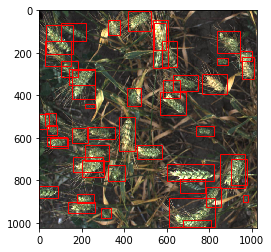

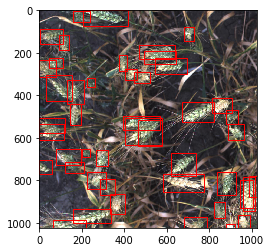

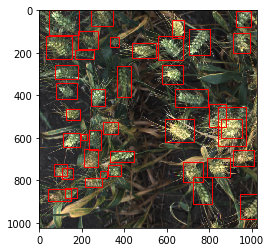

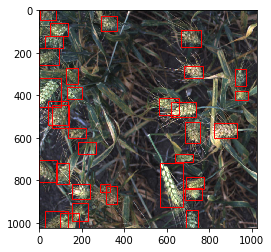

In [54]:
for i, image_id in enumerate(bboxes):
    image_path = train_folder + image_id + '.jpg'
    im = np.array(Image.open(image_path), dtype=np.uint8)
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    
    for xmin, ymin, width, height in bboxes[image_id]:
        rect = patches.Rectangle( (xmin ,ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    if i == 3:
        break

In [ ]:
, , 